# MALE  FEMALE  CLASSIFIER  USING  ML

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

## Loading Data

In [2]:
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## EDA

In [3]:
data.label.value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [4]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [5]:
data = data.replace(to_replace = "male" , value = 1)
data = data.replace(to_replace = 'female', value = 0)

In [6]:
data.label

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int64

In [7]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [8]:
data.shape

(3168, 21)

In [9]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   int6

In [11]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


<AxesSubplot:xlabel='label', ylabel='count'>

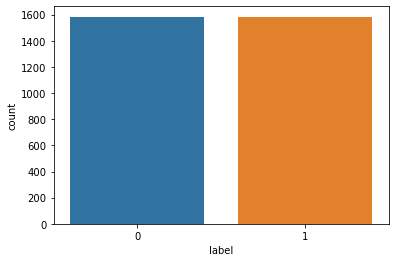

In [12]:
sns.countplot(x = 'label', data =data)

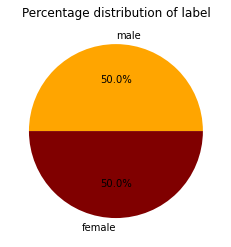

In [13]:
count  = data.pivot_table(columns=['label'], aggfunc='size')
gender = [count[0], count[1]]
pie_labels = ["male", "female"]
colors = ['ORANGE', 'MAROON']
plt.pie(gender, labels=pie_labels, autopct="%1.1f%%", colors=colors)
plt.title("Percentage distribution of label")
plt.show()

## Split the Data

In [14]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

## Train and Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2376, 20)
(792, 20)
(2376,)
(792,)


## Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LOGISTIC REGRESSION

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [21]:
Logistic_accuracy = accuracy_score(y_test,y_pred)

print('Accuracy Score          : ',accuracy_score(y_test,y_pred))

print('\nConfusion Matrix        :  \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report :  \n',classification_report(y_test,y_pred))


Accuracy Score          :  0.9785353535353535

Confusion Matrix        :  

 [[361  12]
 [  5 414]]

Classification Report :  
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       373
           1       0.97      0.99      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



# DECISOION TREE CLASSIFIER

In [22]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
Decision_tree_accuracy = accuracy_score(y_test,y_pred)

print('Accuracy Score        : ',accuracy_score(y_test,y_pred))

print('\nConfusion Matrix      :  \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report :  \n',classification_report(y_test,y_pred))



Accuracy Score        :  0.9671717171717171

Confusion Matrix      :  

 [[360  13]
 [ 13 406]]

Classification Report :  
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       373
           1       0.97      0.97      0.97       419

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



# SVM

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
SVM_accuracy = accuracy_score(y_test,y_pred)

print('Accuracy Score        : ',accuracy_score(y_test,y_pred))

print('\nConfusion Matrix      :  \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report :  \n',classification_report(y_test,y_pred))




Accuracy Score        :  0.9797979797979798

Confusion Matrix      :  

 [[363  10]
 [  6 413]]

Classification Report :  
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       373
           1       0.98      0.99      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



# RANDOM FOREST CLASSIFIER

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
RF_accuracy = accuracy_score(y_test,y_pred)

print('Accuracy Score        : ',accuracy_score(y_test,y_pred))

print('\nConfusion Matrix      :  \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report :  \n',classification_report(y_test,y_pred))





Accuracy Score        :  0.976010101010101

Confusion Matrix      :  

 [[367   6]
 [ 13 406]]

Classification Report :  
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       373
           1       0.99      0.97      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



# KNN CLASSIFIER

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
KNN_accuracy = accuracy_score(y_test,y_pred)

print('Accuracy Score        : ',accuracy_score(y_test,y_pred))

print('\nConfusion Matrix      :  \n\n',confusion_matrix(y_test,y_pred))

print('\nClassification Report :  \n',classification_report(y_test,y_pred))





Accuracy Score        :  0.9772727272727273

Confusion Matrix      :  

 [[362  11]
 [  7 412]]

Classification Report :  
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       373
           1       0.97      0.98      0.98       419

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [34]:
print("LOGISTIC REGRESSION CLASSIFIER = ",Logistic_accuracy)
print("DECISION TREE CLASSIFIER       = ",Decision_tree_accuracy)
print("SVM CLASSIFIER                 = ",SVM_accuracy)
print("RANDOM FOREST CLASSIFIER       = ",RF_accuracy)
print("KNN CLASSIFIER                 = ",KNN_accuracy)

LOGISTIC REGRESSION CLASSIFIER =  0.9785353535353535
DECISION TREE CLASSIFIER       =  0.9671717171717171
SVM CLASSIFIER                 =  0.9797979797979798
RANDOM FOREST CLASSIFIER       =  0.976010101010101
KNN CLASSIFIER                 =  0.9772727272727273


# BEST ACCURACY  -  SVM CLASSIFIER
